In [88]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from statsmodels.tsa.api import ExponentialSmoothing

### Read in the data

In [8]:
# Use the argument header=None so that the first row doesn't become the column headers
normal_data = pd.read_csv('ptbdb_normal.csv', header=None)
abnormal_data = pd.read_csv('ptbdb_abnormal.csv', header=None)

In [9]:
# Display the normal heartbeat data dataframe
normal_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,1.000000,0.929586,0.503550,0.293491,0.169822,0.159763,0.130769,0.125444,0.137278,0.111243,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4042,1.000000,0.637579,0.154837,0.061983,0.088965,0.083374,0.065143,0.057365,0.060039,0.060039,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4043,1.000000,0.872574,0.465071,0.232212,0.126132,0.155886,0.174644,0.190168,0.203752,0.168823,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4044,0.915983,0.529373,0.288406,0.144536,0.171802,0.180669,0.177566,0.176458,0.178896,0.180448,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
# Display the abnormal heartbeat data dataframe
abnormal_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.932233,0.869679,0.886186,0.929626,0.908775,0.933970,0.801043,0.749783,0.687229,0.635100,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.000000,0.606941,0.384181,0.254237,0.223567,0.276836,0.253430,0.184826,0.153349,0.121872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,1.000000,0.951613,0.923963,0.853303,0.791859,0.734255,0.672043,0.685100,0.670507,0.667435,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.977819,0.899261,0.230129,0.032348,0.142329,0.223660,0.328096,0.367837,0.381701,0.389094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.935618,0.801661,0.805815,1.000000,0.722741,0.480789,0.454829,0.319834,0.266874,0.308411,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10501,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10502,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10503,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10504,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Combine the 2 dataframes into a single dataframe

In [11]:
# Combine the two dataframes into one
# using ignore_index=True will fix any indexing issues with the dataframe
# without using ignore_index, there will be double the columns and a bunch of Nan's will appear in the data
heartbeat_data = pd.concat([normal_data, abnormal_data], axis=1, ignore_index=True)

In [12]:
# Display the combined normal and abnormal dataset
heartbeat_data

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


#### Rename the column label to 'label' so that it doesn't get lost in the data

In [18]:
# The last column contains the labels
# label 0 = normal
# label 1 = abnormal
heartbeat_data = heartbeat_data.rename(columns={187: 'label'})

### Visually understand the data

#### Check how many of each label there are

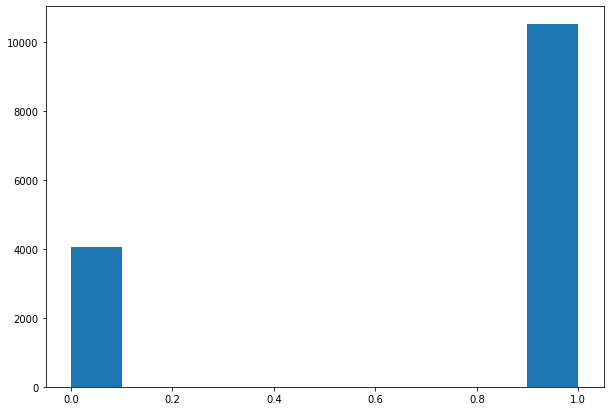

In [28]:
plt.figure(figsize=(10, 7))
plt.hist(heartbeat_data['label'])
plt.show()

#### Note: there are more than double the number of irregular heartbeats as there are normal heartbeats. Think about this when you go to train a model later. If the model is trained on an unproportionate amount of one class, it might do better at predicting that class and worse at predicting the other class

#### Plot a few normal heartbeats

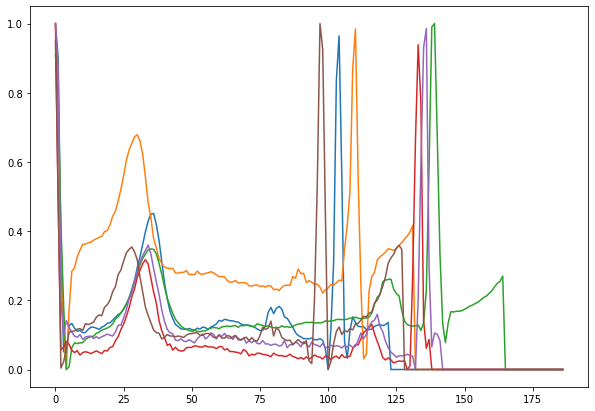

In [106]:
plt.figure(figsize=(10, 7))
for row in normal_data[:6].itertuples():
    plt.plot(range(len(row[1:-1])), row[1:-1])
plt.show()

#### Plot a few abnormal heartbeats

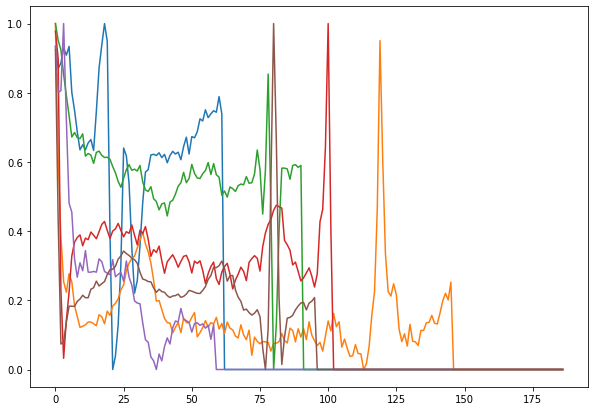

In [53]:
plt.figure(figsize=(10, 7))
for row in abnormal_data[:6].itertuples():
    plt.plot(range(len(row[1:-1])), row[1:-1])
plt.show()

### Experiment with smoothing and peak finding

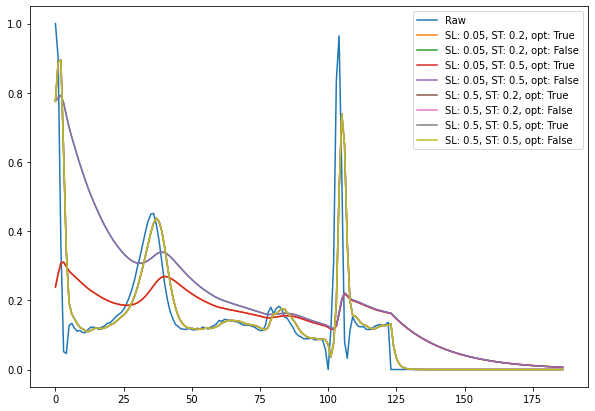

In [121]:
plt.figure(figsize=(10, 7))
for row in normal_data[:1].itertuples():
    plt.plot(range(len(row[1:-1])), row[1:-1], label='Raw')
    smoother = ExponentialSmoothing(row[1:-1])
    for sl in [0.05, 0.5]:
        for st in [0.2, 0.5]:
            for opt in [True, False]:
                smoothed = smoother.fit(smoothing_level=sl, smoothing_trend=st, optimized=opt).fittedvalues
                plt.plot(range(len(row[1:-1])), smoothed, label='SL: '+str(sl)+', ST: '+str(st)+', opt: '+str(opt))
plt.legend()
plt.show()

In [ ]:
# Do peak finding here

### Do a training and testing split on the data

#### For supervised machine learning methods, you want to train a model that you supply the labels for. You will give the model the data and then tell it "these are the labels for the data". Then you want to reserve some data for testing the model. For the test dataset you will keep the labels hidden from the model. You will give it the data and say "what are the labels for this new dataset given what I showed you with the training dataset?". You then validate how the model did by comparing the labels it predicted, with the truth labels.

In [19]:
# For a train test split, you first need to separate X and y
# X = the data, y = the labels
X = heartbeat_data.loc[:, heartbeat_data.columns != 'label']
y = heartbeat_data['label']

In [20]:
# Display what the data separated from the labels looks like
X

,0,1,2,3,4,5,6,7,8,9,...,177,178,179,180,181,182,183,184,185,186
0,1.000000,0.900324,0.358590,0.051459,0.046596,0.126823,0.133306,0.119125,0.110616,0.113047,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.794681,0.375387,0.116883,0.000000,0.171923,0.283859,0.293754,0.325912,0.345083,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.909029,0.791482,0.423169,0.186712,0.000000,0.007836,0.063032,0.077002,0.074957,0.077342,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.478893,0.056760,0.064176,0.081289,0.072732,0.055619,0.048774,0.054478,0.041643,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.000000,0.867238,0.201360,0.099349,0.141336,0.120934,0.108516,0.096393,0.093436,0.100828,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14547,0.981409,1.000000,0.559171,0.287093,0.196639,0.204862,0.215946,0.243833,0.242760,0.250268,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14548,0.906250,0.922379,0.878024,0.810484,0.712702,0.667339,0.608871,0.527218,0.480847,0.442540,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14549,1.000000,0.867971,0.674122,0.470332,0.296987,0.169307,0.077664,0.081392,0.074868,0.089779,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14550,1.000000,0.984672,0.658888,0.556394,0.446809,0.395790,0.315260,0.276367,0.261039,0.258522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
# Display what the labels look like without the data
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
14547    1.0
14548    1.0
14549    1.0
14550    1.0
14551    1.0
Name: label, Length: 14552, dtype: float64

In [59]:
# Do the train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Note: the "test_size" value is something you can play with. 0.2 means that 20% of the data will be held for testing, and the remaining 80% will be the training set. You can change this value but a rule of thumb is that test_size should be between 0.5 (i.e. 50%) and 0.1 (i.e. 10%). Common values are 0.2, 0.25, and 0.3.

In [ ]:
# Check the difference in accuracy when you change the train/test split

### Preprocessing

#### You may want to normalize the data (for example, getting all values between 0 and 1) or do other preprocessing techniques to the features (for example, doing PCA to reduce multidimensional data into less dimensions). For now, let's skip this step since our data is between 0 and 1 already, and because we aren't yet sure how reducing the datapoints will effect this data. After you train a model, go back and try some of these techniques to see if the accuracy gets worse or better.

### Run data through a logistic regression classifier to do binary classification

In [79]:
# Set up the model
model = LogisticRegression(penalty='l2', tol=0.0001, max_iter=1000, random_state=28)

In [80]:
# Fit the model using the training and testing data
model = model.fit(X_train, y_train)

/Users/pruett6/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [89]:
# These are the predicted labels for the test dataset
y_predicted = model.predict(X_test)
print(y_predicted)

[0. 1. 1. ... 0. 0. 1.]


/Users/pruett6/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [82]:
# This tells you the probability that the row belongs to the two classes
# it is in the format [label 0 probability, label 1 probability]
print(model.predict_proba(X_test))

[[0.81245218 0.18754782]
 [0.48773704 0.51226296]
 [0.00154656 0.99845344]
 ...
 [0.8073913  0.1926087 ]
 [0.70856826 0.29143174]
 [0.00819268 0.99180732]]


/Users/pruett6/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [86]:
# This is the overall accuracy of the classifier
print(model.score(X_test, y_test)*100, '%')

82.7550669872896 %


/Users/pruett6/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [90]:
# This is how many true positives, false positives, true negatives, and false negatives exist in the results
confusion_matrix(y_test, y_predicted)

array([[ 499,  335],
       [ 167, 1910]])

In [92]:
# This is the same, but fractions instead of data point numbers
confusion_matrix(y_test, y_predicted, normalize='true')

array([[0.59832134, 0.40167866],
       [0.08040443, 0.91959557]])

#### For some datasets, you want to maximize or minimize certain of these quantities instead of just looking at the overall accuracy

### Change parameters and re-run your models

#### See the "Preprocessing" block above for things you can do to normalize the data before running through the model

#### Another thing to try is hyperparameter sweeps on your model. Any value you pass to the model is a hyperparameter. In the logistic regression model try changing the values of 'penalty', 'tol', etc. and see how the classification accuracy is affected. Try looping over combinations of these parameters if you know the bounds. Some of the hyperparameters depend on each other so just because increasing the tolerance value with one penalty value set doesn't mean that a new penalty value will have the same best tolerance value. You need to try multiple combinations!